<a href="https://colab.research.google.com/github/madhukarad/Assignments-/blob/master/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [2]:
!kaggle datasets download -d mathchi/online-retail-ii-data-set-from-ml-repository

 97% 56.0M/57.5M [00:03<00:00, 18.1MB/s]
100% 57.5M/57.5M [00:03<00:00, 16.2MB/s]


In [3]:
'chmod 600 /content/kaggle.json'


'chmod 600 /content/kaggle.json'

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [6]:
!unzip \*.zip && rm *.zip

Archive:  online-retail-ii-data-set-from-ml-repository.zip
  inflating: Year 2009-2010.csv      
  inflating: Year 2010-2011.csv      
  inflating: online_retail_II.xlsx   


In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.compose import ColumnTransformer # encode categorical data to discrete values
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling

In [8]:
df1 = pd.read_csv('/content/Year 2009-2010.csv', sep=',', header=0,encoding= 'unicode_escape')
df2 = pd.read_csv('/content/Year 2010-2011.csv', sep=',', header=0,encoding= 'unicode_escape')
data = pd.concat([df1,df2])
print(data.shape)

(1067371, 8)


In [10]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


In [9]:
data.dtypes

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object

In [10]:
# checking if there is any NULL values present in the data

data.isnull().sum()


Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

Cleen Data

In [11]:
DClean = data.dropna()
DClean.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [24]:
print(DClean.shape)

(824364, 8)


In [12]:
dup = data.duplicated().sum()
print(f'The total number of duplicated values in the dataset: {dup}')

The total number of duplicated values in the dataset: 34335


In [13]:
dup1 = DClean.duplicated().sum()
print(f'The total number of duplicated values in the dataset: {dup1}')

The total number of duplicated values in the dataset: 26479


In [28]:
# Dataset Columns
DClean.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [31]:
# Statistical summary of the dataset
DClean.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,824364.0,12.414574,188.976099,-80995.0,2.00,5.00,12.00,80995.0
Price,824364.0,3.676800,70.241388,0.0,1.25,1.95,3.75,38970.0
Customer ID,824364.0,15324.638504,1697.464450,12346.0,13975.00,15255.00,16797.00,18287.0


In [17]:
# checking how many quantity of products have been sold online from each country

df3 = DClean['Quantity'].groupby(DClean['Country']).agg('sum')

**First, let's see what percentage of total sales each country** **bold text**

In [48]:
# Import Libraries

import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', 500)

plt.style.use('ggplot')

import missingno as msno


from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [24]:
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

In [25]:
data.isna().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [46]:
#data.head(5)
data.tail(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
541909,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


***Know Your Data***

**Dataset Rows & Columns**

In [36]:

# Dimension of the datasets
rows, columns = data.shape
print(f'The dataset has', rows, 'rows and', columns, 'columns')

The dataset has 1067371 rows and 8 columns


In [37]:
# The total number of columns in the dataset

print('The total number of columns in the dataset: ', data.shape[1], '\nThese are:')

count = 1
for col in data.columns.to_list():
  print(count,'.', col)
  count += 1

The total number of columns in the dataset:  8 
These are:
1 . Invoice
2 . StockCode
3 . Description
4 . Quantity
5 . InvoiceDate
6 . Price
7 . Customer ID
8 . Country


In [38]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


In [40]:
# Dataset Duplicate Value Count
dup = data.duplicated().sum()
print(f'The total number of duplicated values in the dataset: {dup}')

The total number of duplicated values in the dataset: 34335


In [41]:

missing = data.columns[data.isnull().any()].tolist()
missing
round(data[missing].isnull().mean() * 100, 2).sort_values(ascending = False)

Customer ID    22.77
Description     0.41
dtype: float64

In [42]:
# Missing Values/Null Values Count
missing = data.columns[data.isnull().any()].tolist()
missing

print('Missing Data count')
print(data[missing].isnull().sum().sort_values(ascending=False))
print()

print('++'*12)
print()
print('Missing Data Percentage')
print(round(data[missing].isnull().mean() * 100, 2).sort_values(ascending = False))

Missing Data count
Customer ID    243007
Description      4382
dtype: int64

++++++++++++++++++++++++

Missing Data Percentage
Customer ID    22.77
Description     0.41
dtype: float64


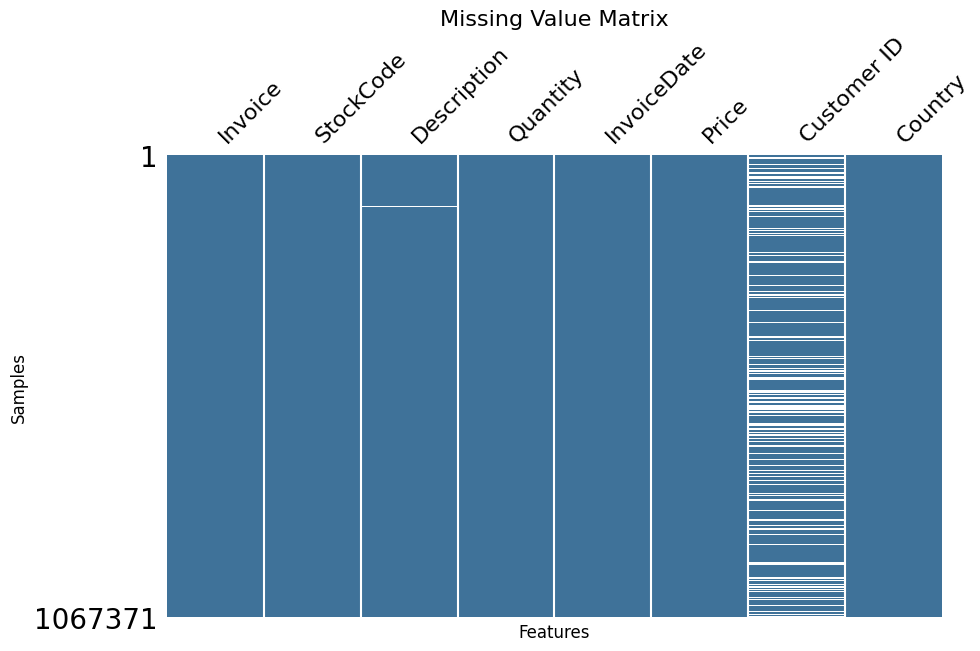

In [43]:
import missingno as msno

# create missing value matrix plot
msno.matrix(data, figsize=(10,6), sparkline=False, color=(0.25, 0.45, 0.6))

# customize plot
plt.title('Missing Value Matrix', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Samples', fontsize=12)
plt.show()

**Find Top Selling products**

In [50]:
# Creat a dataframe without cancelled ordered
temp_df = data[~data['Invoice'].astype(str).str.contains('C')]

In [51]:
# Group the dataset by Description column and calculate the sum of the quantity sold for each product
# Select the top 10 products
product = temp_df.groupby('Description')['Quantity'].sum().sort_values(ascending = False).head(20)

# Create the dataframe containing the top 20 selling products
top_product = pd.DataFrame({'Product': product.index, 'Quantity Sold': product.values})
top_product


,Product,Quantity Sold
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,110249
1,WHITE HANGING HEART T-LIGHT HOLDER,96688
2,ASSORTED COLOUR BIRD ORNAMENT,81817
3,"PAPER CRAFT , LITTLE BIRDIE",80995
4,JUMBO BAG RED RETROSPOT,79285
5,MEDIUM CERAMIC TOP STORAGE JAR,78033
6,BROCADE RING PURSE,71440
7,PACK OF 60 PINK PAISLEY CAKE CASES,56794
8,60 TEATIME FAIRY CAKE CASES,54716
9,SMALL POPCORN HOLDER,49984


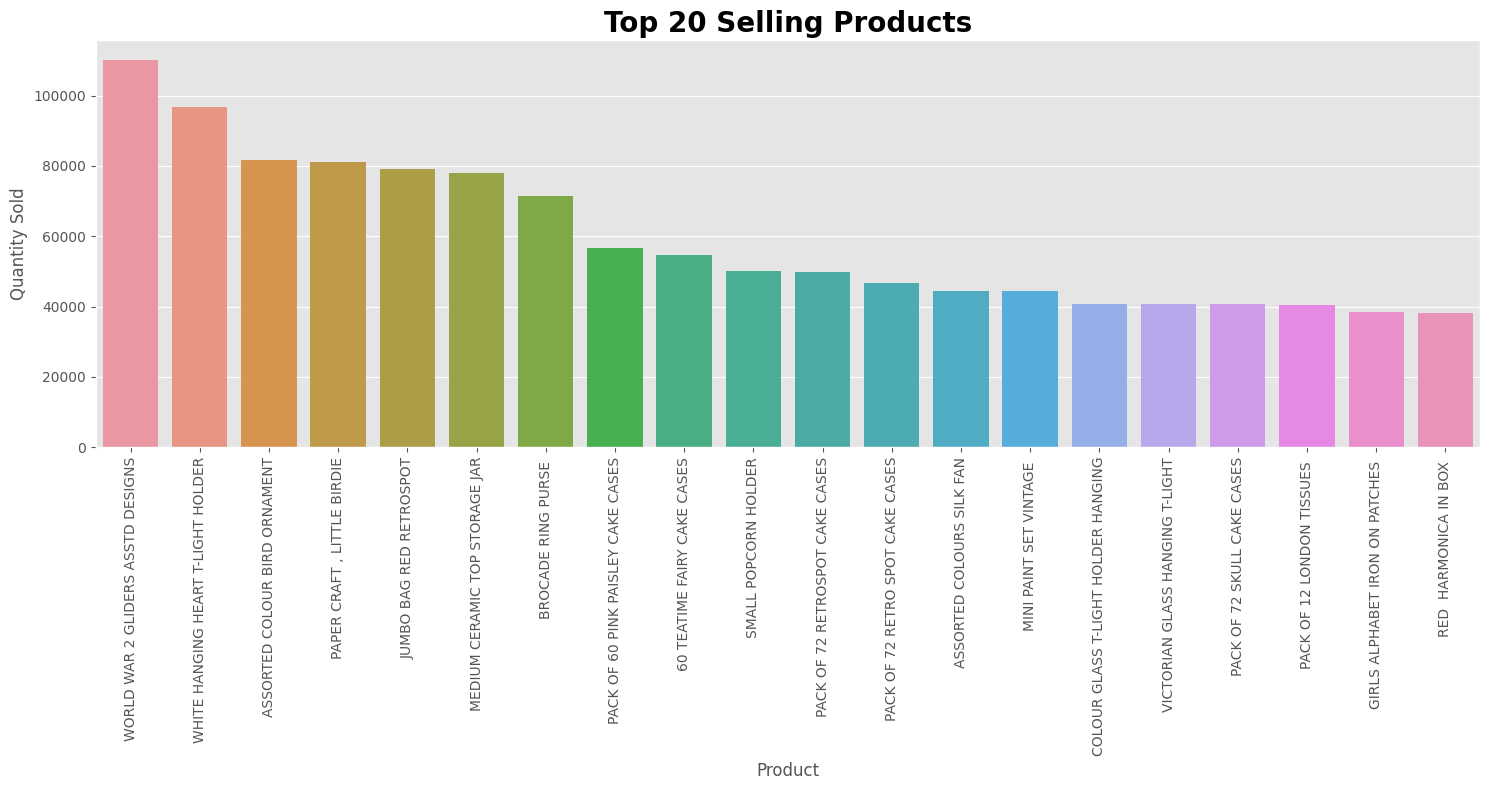

In [53]:
import random
# Generate a list of random colors
#color = [tuple(random.random() for i in range(3)) for j in range(len(top_product))]

# Plot bar chart
plt.figure(figsize = (15, 8))
sns.barplot(top_product, x = 'Product', y = 'Quantity Sold')

# Set the title
plt.title('Top 20 Selling Products', size=20, fontweight='bold')
#plt.xlabel('Product', size = 15)
#plt.ylabel('Quantity Sold', size = 15)

# Rotate the x-axis labels
plt.xticks(rotation = 90)

# Display the chart
plt.tight_layout()

**Least Selling Products**

In [55]:

# Remove all missing and duplicate values in the CustomerID column
temp_df = temp_df.dropna(subset = ['Customer ID'], how = 'all').drop_duplicates()

In [57]:
# Group the dataset by Description column and calculate the sum of the quantity sold for each product
# Select the top 10 least products
least_product = temp_df.groupby('Description')['Quantity'].sum().sort_values().head(20)

# Create the dataframe containing the top 20 selling products
least_selling_products = pd.DataFrame({'Product': least_product.index, 'Quantity Sold': least_product.values})
least_selling_products

,Product,Quantity Sold
0,"BLACK RND BULLET""KEEP CLEAN"" BIN",1
1,"F.FAIRY S/3 SML CANDLE, ROSE",1
2,CRACKED GLAZE EARRINGS BROWN,1
3,RED SPOTTY PASSPORT COVER,1
4,WHITE SCANDINAVIAN HEART CHRISTMAS,1
5,FEATHER HEART LIGHTS,1
6,"F.FAIRY S/3 SML CANDLE, LAVENDER",1
7,"F.FAIRY S/3 SML CANDLE,LILY/VALLEY",1
8,VINTAGE METAL CAKE STAND CREAM,1
9,SPOTTY COCKEREL DOORSTOP,1


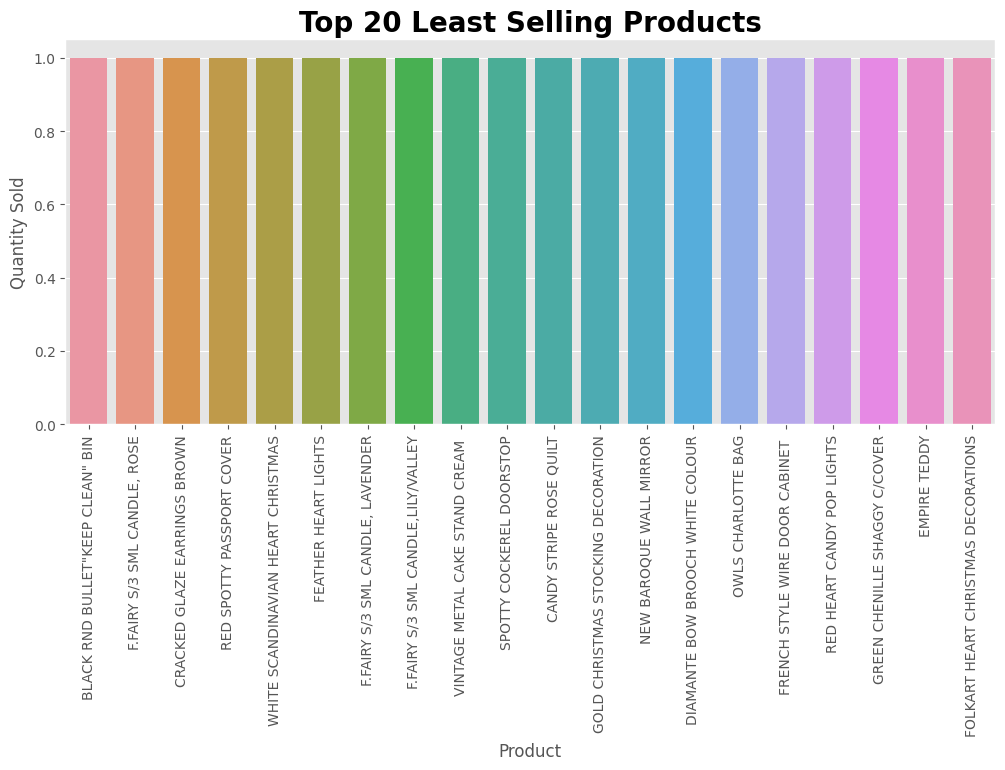

In [59]:
# Plot the top 20 least selling products as a bar chart
plt.figure(figsize = (12, 5))
sns.barplot(least_selling_products, x = 'Product', y = 'Quantity Sold')

# Set title
plt.title('Top 20 Least Selling Products', size = 20, fontweight = 'bold')
#plt.xlabel('Product', size = 15)
#plt.ylabel('Quatity Sold', size = 15)

plt.xticks(rotation = 90);

**Top Customers**

In [60]:
# Create dataframe containing only top 20 customers
top_customers = temp_df['Customer ID'].value_counts().sort_values(ascending = False).reset_index().rename(columns = {'index' : 'Customer ID', 'Customer ID': 'Count'}).head(20)

top_customers

,Customer ID,Count
0,17841.0,12435
1,14911.0,11079
2,12748.0,6587
3,14606.0,6359
4,14096.0,5111
5,15311.0,4306
6,14156.0,4038
7,14646.0,3854
8,13089.0,3316
9,16549.0,3093


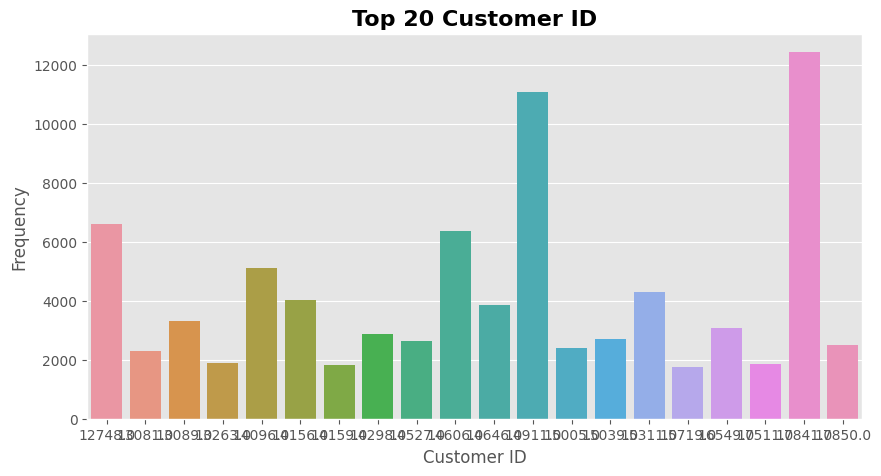

In [62]:
plt.figure(figsize = (10, 5))

# Create the bar plot
sns.barplot(data = top_customers, x = 'Customer ID', y = 'Count')

# Add labels and a title
plt.title('Top 20 Customer ID', fontsize = 16, fontweight = 'bold')
plt.xlabel('Customer ID')
plt.ylabel('Frequency');


In [63]:
# Create a dataframe containing countries count
countries = temp_df['Country'].value_counts().reset_index().rename(columns = {'index': 'Country', 'Country': 'Count'})

# Display top 20 countries
countries.head(20)

,Country,Count
0,United Kingdom,700434
1,Germany,16440
2,EIRE,15567
3,France,13512
4,Netherlands,5090
5,Spain,3663
6,Belgium,3056
7,Switzerland,3006
8,Portugal,2356
9,Australia,1792


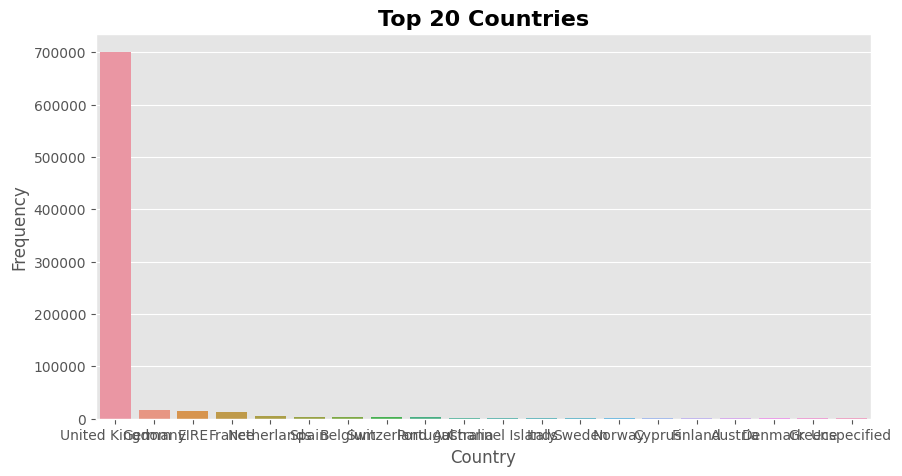

In [64]:
plt.figure(figsize = (10, 5))

# Create the bar plot
sns.barplot(data = countries[:20], x = 'Country', y = 'Count')

# Add labels and a title
plt.title('Top 20 Countries', fontsize = 16, fontweight = 'bold')
#plt.xlabel('Country')
plt.ylabel('Frequency');

**Handling Missing Values**

In [65]:
# Missing value
print(data.isnull().sum())

# Missing value percentage

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64


In [66]:
# Check for duplicates in the retail dataframe
missing = data.columns[data.isnull().any()].tolist()
missing

print('Missing Data count')
print(data[missing].isnull().sum().sort_values(ascending=False))
print()

print('++'*12)
print()
print('Missing Data Percentage')
print(round(data[missing].isnull().mean() * 100, 2).sort_values(ascending = False))

Missing Data count
Customer ID    243007
Description      4382
dtype: int64

++++++++++++++++++++++++

Missing Data Percentage
Customer ID    22.77
Description     0.41
dtype: float64


In [68]:

# Create a copy of the original dataframe
df = data.copy()

# Remove all rows with missing values in CustomerID column.
df.dropna(subset = ['Customer ID'], how = 'all', inplace = True)

# Check for any missing values in the dataset
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [70]:
df.shape

(824364, 8)

**Handling duplicate values**

In [71]:
# Check for duplicate values in the dataset
df.duplicated().sum()

26479

In [72]:
# Drop all the duplicate values in the dataset
df.drop_duplicates(inplace = True)

# Check for any duplicate values in the dataset
df.duplicated().sum()

0

In [73]:
# Check the dimension of the dataset after removing duplicated
df.shape

(797885, 8)

**Removing the Cancelled order**

In [74]:
# Remove all the rows that starts with 'C' in InvoiceNo. Here, 'C' stands for cancellation
df = df[~df['Invoice'].astype(str).str.contains('C')]

# Check the dimension of the dataframe
df.shape

(779495, 8)

**Feature Engineering**

In [78]:
# Create a new feature called TotalCost
df['TotalCost'] = df['Quantity'] * df['Price']

# Create a new feature Date
df['Date'] = df['InvoiceDate'].dt.date

# Sample of the dataset
df.sample(5)



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalCost,Date
98294,544676,85176,SEWING SUSAN 21 NEEDLE SET,3,2011-02-22 16:03:00,0.85,17841.0,United Kingdom,2.55,2011-02-22
459800,575880,23382,BOX OF 6 CHRISTMAS CAKE DECORATIONS,4,2011-11-11 13:35:00,3.75,12726.0,France,15.00,2011-11-11
134176,502189,21559,STRAWBERRY LUNCHBOX WITH CUTLERY,1,2010-03-23 11:41:00,2.55,15003.0,United Kingdom,2.55,2010-03-23
412530,572290,22659,LUNCH BOX I LOVE LONDON,6,2011-10-23 12:46:00,1.95,14800.0,United Kingdom,11.70,2011-10-23
489171,535263,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,36,2010-11-25 13:29:00,0.65,14710.0,United Kingdom,23.40,2010-11-25


**RFM Analysis**

In [80]:
# Group the dataset by customerID and find the most recent purchase date for each customer
recency_df = df.groupby('Customer ID')['Date'].max().reset_index().rename(columns = {'Date': 'LastPurchaseDate'})

# Display the first few rows of the dataframe to inspect the results
recency_df.head()

,Customer ID,LastPurchaseDate
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02
